# KMeans and Extended KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from collections import Counter

In [2]:
X, cluster_assignments = make_blobs(n_samples=200, centers=4,cluster_std=0.60, random_state=0)

In [3]:
def __init__():
    k = 5
    max_iterations = 100

# Canonical KMeans Implementation

In [4]:
def fit(X, k, max_iterations):
    centroids = X[np.random.choice(len(X), k)]
    closest = np.zeros(len(X)).astype(int)

    for iterations in range(max_iterations):
        distances = cdist(X, centroids)
        closest = np.argmin(distances, axis=1)
    
        for i in range(k):
            centroids[i, :] = X[closest == i].mean(axis=0)

    return closest, centroids

In [5]:
def compareList(l1, l2):
    return [i==j for i, j in zip(l1, l2)]

## Output for canonical KMeans implementation

In [6]:
cluster_hyp, centroids = fit(X, 5, 100)
print("List of the cluster hypothesis:\n", cluster_hyp)
print("List containing lists of the cluster centroid's values:\n", centroids)
print("Cluster assignments:\n", cluster_assignments)

compared = compareList(cluster_hyp, cluster_assignments)
print("Similarity between hypothesis and cluster assignments ", Counter(compared))

Counter(cluster_hyp)

List of the cluster hypothesis:
 [4 3 1 0 4 1 3 1 1 1 1 4 3 3 4 1 0 2 0 4 0 3 4 3 4 4 2 4 4 1 2 1 3 4 3 1 3
 1 1 0 2 2 2 1 4 3 1 0 0 1 2 3 3 2 1 0 3 4 1 4 0 1 4 1 0 1 4 0 3 3 4 4 1 1
 3 2 3 3 4 4 0 1 4 3 3 1 1 4 3 3 2 2 0 1 1 4 3 0 1 1 2 4 4 0 2 3 1 4 4 1 2
 3 3 4 4 1 3 3 0 1 0 3 1 4 1 3 1 3 4 1 3 4 3 2 2 3 2 0 4 2 4 3 4 4 3 4 1 4
 3 0 0 0 1 3 4 1 0 3 2 4 0 4 4 3 3 2 1 4 4 3 4 1 3 2 0 2 1 1 3 1 3 4 1 4 1
 3 3 0 1 2 4 4 1 2 3 3 3 1 2 4]
List containing lists of the cluster centroid's values:
 [[-1.79537069  7.60311865]
 [ 0.90793962  4.35713791]
 [-0.90148361  7.83881232]
 [-1.62401415  2.9159629 ]
 [ 2.07187892  0.97422926]]
Cluster assignments:
 [1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 

Counter({4: 50, 3: 50, 1: 50, 0: 25, 2: 25})

# Extended KMeans Implementation

In [7]:
def fit2(X, k, max_iterations, boolean):
    centroids = X[np.random.choice(len(X), k)]
    closest = np.zeros(len(X)).astype(int)

    if boolean == False:
        for iterations in range(max_iterations):
            distances = cdist(X, centroids)
            closest = np.argmin(distances, axis=1)
    
            for i in range(k):
                centroids[i, :] = X[closest == i].mean(axis=0)

        return closest, centroids
        
    if boolean == True: 
        for iterations in range(max_iterations):
            distances = cdist(X, centroids)
            closest = np.argmin(distances, axis=1)        
            
            for i in range(k):
                centroids[i, :] = X[closest == i].mean(axis=0)
    
                          
        return closest, centroids
    

## Output for extended KMeans implementation

### False boolean

In [8]:
cluster_hyp, centroids = fit2(X, 5, 100, False)
print("List of the cluster hypothesis:\n", cluster_hyp)
print("List containing lists of the cluster centroid's values:\n", centroids)
print("Cluster assignments:\n", cluster_assignments)

compared = compareList(cluster_hyp, cluster_assignments)
print("Similarity between hypothesis and cluster assignments ", Counter(compared))

Counter(cluster_hyp)

List of the cluster hypothesis:
 [1 0 2 4 3 2 0 2 2 2 2 3 0 0 1 2 4 4 4 1 4 0 3 0 1 3 4 3 3 2 4 2 0 1 0 2 0
 2 2 4 4 4 4 2 3 0 2 4 4 2 4 0 0 4 2 4 0 3 2 1 4 2 1 2 4 2 1 4 0 0 3 3 2 2
 0 4 0 0 1 3 4 2 1 0 0 2 2 3 0 0 4 4 4 2 2 1 0 4 2 2 4 1 1 4 4 0 2 1 1 2 4
 0 0 1 3 2 0 0 4 2 4 0 2 3 2 0 2 0 3 2 0 1 0 4 4 0 4 4 3 4 3 0 1 1 0 3 2 1
 0 4 4 4 2 0 1 2 4 0 4 1 4 3 3 0 0 4 2 3 1 0 1 2 0 4 4 4 2 2 0 2 0 3 2 3 2
 0 0 4 2 4 3 3 2 4 0 0 0 2 4 1]
List containing lists of the cluster centroid's values:
 [[-1.62401415  2.9159629 ]
 [ 2.25966824  1.46435077]
 [ 0.90793962  4.35713791]
 [ 1.88408961  0.48410776]
 [-1.34842715  7.72096548]]
Cluster assignments:
 [1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 

Counter({1: 25, 0: 50, 2: 50, 4: 50, 3: 25})

### True boolean

In [9]:
cluster_hyp, centroids = fit2(X, 5, 100, True)
print("List of the cluster hypothesis:\n", cluster_hyp)
print("List containing lists of the cluster centroid's values:\n", centroids)
print("Cluster assignments:\n", cluster_assignments)

compared = compareList(cluster_hyp, cluster_assignments)
print("Similarity between hypothesis and cluster assignments ", Counter(compared))

Counter(cluster_hyp)

List of the cluster hypothesis:
 [3 4 1 2 3 0 4 1 1 1 1 3 4 4 3 1 2 2 2 3 2 4 3 4 3 3 2 3 3 1 2 1 4 3 4 1 4
 1 0 2 2 2 2 1 3 4 1 2 2 1 2 4 4 2 1 2 4 3 0 3 2 1 3 1 2 1 3 2 4 4 3 3 1 1
 4 2 4 4 3 3 2 0 3 4 4 0 1 3 4 4 2 2 2 0 0 3 4 2 1 0 2 3 3 2 2 4 1 3 3 1 2
 4 4 3 3 1 4 4 2 1 2 4 0 3 1 4 1 4 3 1 4 3 4 2 2 4 2 2 3 2 3 4 3 3 4 3 1 3
 4 2 2 2 1 4 3 0 2 4 2 3 2 3 3 4 4 2 1 3 3 4 3 1 4 2 2 2 0 0 4 0 4 3 1 3 1
 4 4 2 0 2 3 3 1 2 4 4 4 1 2 3]
List containing lists of the cluster centroid's values:
 [[ 0.31253891  4.87814416]
 [ 1.13948434  4.15452437]
 [-1.34842715  7.72096548]
 [ 2.07187892  0.97422926]
 [-1.62401415  2.9159629 ]]
Cluster assignments:
 [1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 

Counter({3: 50, 4: 50, 1: 36, 2: 50, 0: 14})

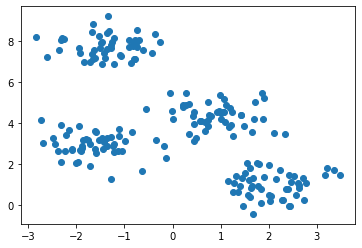

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Performance Comparison: 


In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(X)
print("KMeans labels: \n", kmeans.labels_)

print("KMeans cluster_centers:\n", kmeans.cluster_centers_)

KMeans labels: 
 [4 3 2 1 0 2 3 2 2 2 2 0 3 3 4 2 1 1 1 4 1 3 0 3 4 0 1 0 0 2 1 2 3 4 3 2 3
 2 2 1 1 1 1 2 0 3 2 1 1 2 1 3 3 1 2 1 3 0 2 4 1 2 4 2 1 2 4 1 3 3 0 0 2 2
 3 1 3 3 4 0 1 2 4 3 3 2 2 0 3 3 1 1 1 2 2 4 3 1 2 2 1 4 4 1 1 3 2 4 4 2 1
 3 3 4 0 2 3 3 1 2 1 3 2 0 2 3 2 3 0 2 3 4 3 1 1 3 1 1 0 1 0 3 4 4 3 0 2 4
 3 1 1 1 2 3 4 2 1 3 1 4 1 0 0 3 3 1 2 0 4 3 4 2 3 1 1 1 2 2 3 2 3 0 2 0 2
 3 3 1 2 1 0 0 2 1 3 3 3 2 1 4]
KMeans cluster_centers:
 [[ 1.88408961  0.48410776]
 [-1.34842715  7.72096548]
 [ 0.90793962  4.35713791]
 [-1.62401415  2.9159629 ]
 [ 2.25966824  1.46435077]]


In [12]:
compared = compareList(cluster_hyp, kmeans.labels_)
print("Similarity between my implementation and scikit-learn toolkit: \n", Counter(compared))
difference = centroids - kmeans.cluster_centers_
difference

Similarity between my implementation and scikit-learn toolkit: 
 Counter({False: 200})


array([[-1.5715507 ,  4.3940364 ],
       [ 2.48791149, -3.56644111],
       [-2.25636676,  3.36382757],
       [ 3.69589307, -1.94173364],
       [-3.88368239,  1.45161214]])

###### My implementaiton showed very different results compared to scikit-learn toolkit's implementation: 
    - only a couple of the points in the data were in the same cluster as scikit-learn toolkit's 
    - the cluster centers were somewhat different in my implementation compared to scikit-learn toolkit's

# Clustering Algorithms 

In [42]:
df = pd.read_csv('chicago_taxi.csv')
df = df.sample(n=1000)
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,1000.00000,1000.00000,6.200000e+02,6.130000e+02,939.000000,916.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,939.000000,939.000000,918.000000,918.000000
mean,798.43100,3.83422,1.703142e+10,1.703140e+10,27.585729,22.936681,14.533270,2.019120,0.0,1.001050,17.69289,41.899001,-87.667414,41.898918,-87.653448
std,757.43541,6.97903,3.470671e+05,3.384498e+05,21.310024,17.155105,16.663001,3.394834,0.0,3.236228,21.05054,0.044277,0.085615,0.038209,0.055467
min,0.00000,0.00000,1.703103e+10,1.703103e+10,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,2.00000,41.673820,-87.913625,41.706588,-87.913625
25%,358.50000,0.57750,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.0,0.000000,7.00000,41.880994,-87.655998,41.880994,-87.655998
50%,540.00000,1.20000,1.703128e+10,1.703128e+10,28.000000,25.000000,7.750000,0.000000,0.0,0.000000,9.75000,41.890922,-87.632746,41.892042,-87.633308
75%,1020.00000,3.12750,1.703184e+10,1.703184e+10,32.000000,32.000000,14.500000,2.212500,0.0,1.000000,16.63750,41.900221,-87.626211,41.902788,-87.626215
max,8037.00000,127.19000,1.703198e+10,1.703198e+10,77.000000,77.000000,291.000000,45.000000,0.0,44.000000,345.50000,42.009623,-87.551428,42.009623,-87.572717


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 125384 to 48051
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip ID                     1000 non-null   object 
 1   Taxi ID                     1000 non-null   object 
 2   Trip Start Timestamp        1000 non-null   object 
 3   Trip End Timestamp          1000 non-null   object 
 4   Trip Seconds                1000 non-null   float64
 5   Trip Miles                  1000 non-null   float64
 6   Pickup Census Tract         620 non-null    float64
 7   Dropoff Census Tract        613 non-null    float64
 8   Pickup Community Area       939 non-null    float64
 9   Dropoff Community Area      916 non-null    float64
 10  Fare                        1000 non-null   float64
 11  Tips                        1000 non-null   float64
 12  Tolls                       1000 non-null   float64
 13  Extras                     

In [44]:
df['Company'].value_counts()

Taxi Affiliation Services                       239
Flash Cab                                       171
Chicago Carriage Cab Corp                        93
Sun Taxi                                         81
City Service                                     75
Medallion Leasin                                 66
Star North Management LLC                        53
Blue Ribbon Taxi Association Inc.                42
Taxicab Insurance Agency, LLC                    42
Choice Taxi Association                          28
Chicago Independents                             22
Nova Taxi Affiliation Llc                        18
Patriot Taxi Dba Peace Taxi Associat             12
Top Cab Affiliation                              12
24 Seven Taxi                                    10
Chicago Taxicab                                   7
KOAM Taxi Association                             5
Setare Inc                                        5
Chicago Medallion Management                      5
Suburban Dis

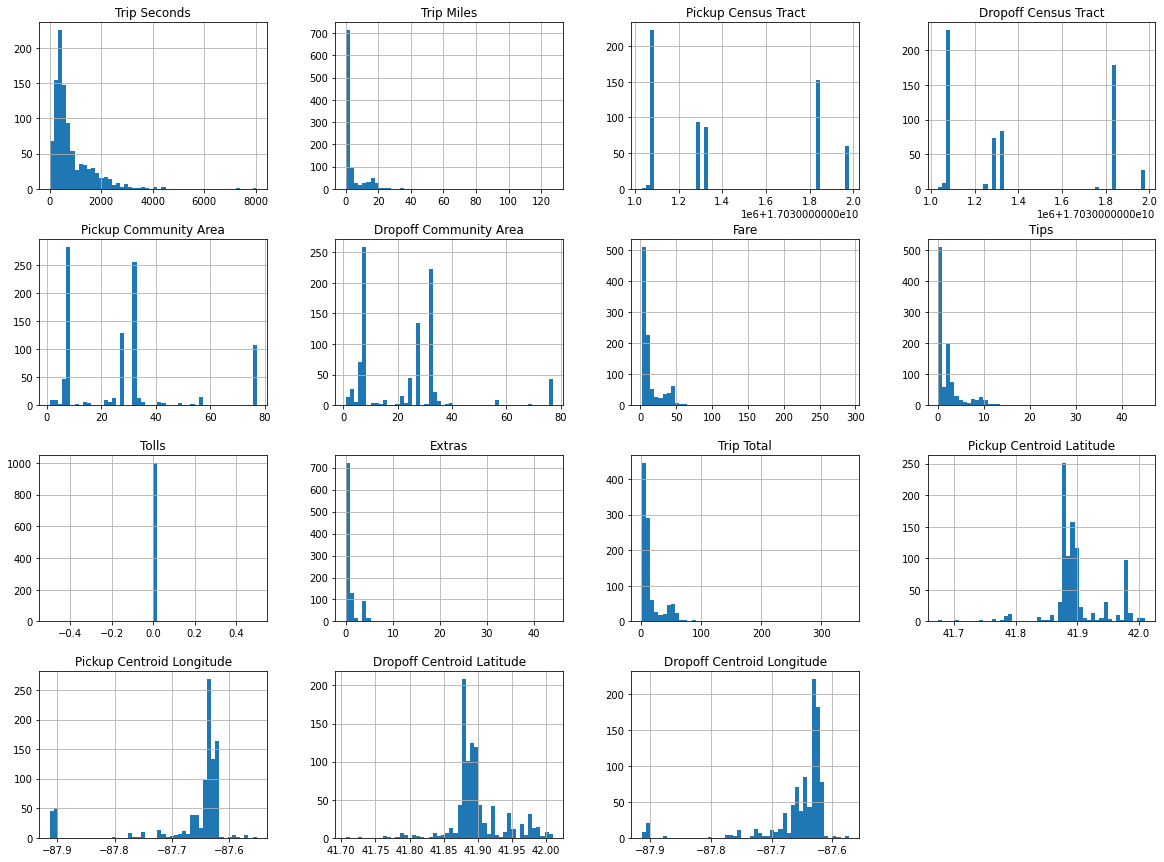

In [45]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

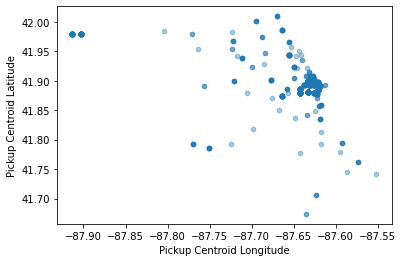

In [46]:
df.plot(kind = 'scatter', x= 'Pickup Centroid Longitude', y = 'Pickup Centroid Latitude', alpha=.4)
plt.show()

/Users/andytamez/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


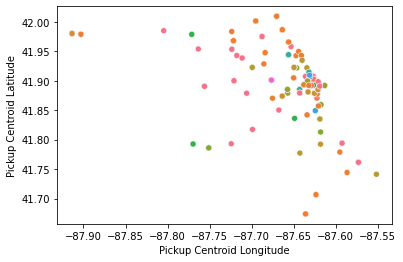

In [49]:
import seaborn as sns

sns.scatterplot('Pickup Centroid Longitude', 'Pickup Centroid Latitude', hue='Company', data=df, legend=False)
plt.show()

In [55]:
new_df = df[['Company', 'Trip Miles', 'Fare']]
new_df

,Company,Trip Miles,Fare
125384,Taxi Affiliation Services,15.60,39.25
95482,"Taxicab Insurance Agency, LLC",1.50,7.50
130329,Flash Cab,1.77,7.75
226252,Choice Taxi Association,2.20,9.00
33664,Sun Taxi,15.36,40.00
...,...,...,...
131796,Taxi Affiliation Services,0.00,7.50
286683,Sun Taxi,7.92,23.00
280999,Flash Cab,0.63,5.75
272021,Sun Taxi,0.91,6.50


In [59]:
def leaf_label_function(taxi):
    return new_df.iloc[taxi,1]

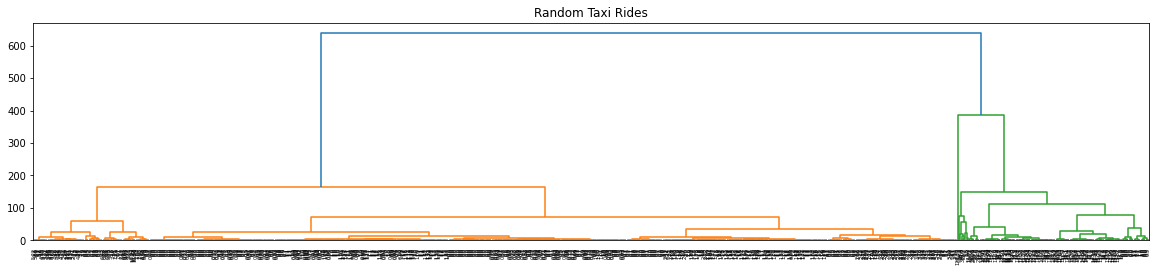

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 4))
plt.title("Random Taxi Rides")
dend = dendrogram(linkage(new_df[['Trip Miles', 'Fare']], method='ward'), 
                  leaf_label_func = leaf_label_function)
plt.show()


###### The reason why you chose the clustering algorithm(s)
    - I chose this clustering algorithm to see the relationship between a taxi company, the length of the ride and how much they charge
    
###### Any pre-processing of the data or any hyperparameter settings
    - Since dataset was large, I randomly selected 200 taxi rides from the data set
    
###### Output from the algorithm(s) -- show what clusters were generated
    - I have added a visualization of the output of the algorithm

###### The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
    - I did recieve what I expected, I expected it to have a similar fare and distance between different rides completed by different companies, but some ended up being a little more expensive and longer than others. If I had more time for this assignment I would find out the relationship between the latitude and longitude and the fare (maybe some areas are more expensive than others) 